(50, 133, 5, 1)
(6, 124, 11, 2)
(54, 119, 2, 1)
(47, 119, 2, 1)
(45, 119, 1, 1)
(51, 118, 1, 1)
(10, 116, 2, 1)
(1, 116, 3, 1)
(58, 8, 1, 1)
(50, 8, 3, 1)
(49, 3, 3, 1)
(66, 2, 1, 1)
(0, 0, 241, 163)


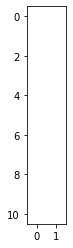

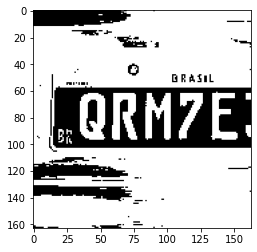

In [91]:
# Imports:
import cv2
import numpy as np

# Read Input image
inputImage = cv2.imread('image5.jpg')

# Deep copy for results:
inputImageCopy = inputImage.copy()

# Convert BGR to grayscale:
grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)

# Threshold via Otsu:
threshValue, binaryImage = cv2.threshold(grayscaleImage, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Flood-fill border, seed at (0,0) and use black (0) color:
cv2.floodFill(binaryImage, None, (0, 0), 0)

# Get each bounding box
# Find the big contours/blobs on the filtered image:
contours, hierarchy = cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Look for the outer bounding boxes (no children):
for _, c in enumerate(contours):

    # Get the bounding rectangle of the current contour:
    boundRect = cv2.boundingRect(c)
    print(boundRect)

    # Get the bounding rectangle data:
    rectX = boundRect[0]
    rectY = boundRect[1]
    rectWidth = boundRect[2]
    rectHeight = boundRect[3]

    # Estimate the bounding rect area:
    rectArea = rectWidth * rectHeight

    # Set a min area threshold
    minArea = 10
    maxArea = 4

    # Filter blobs by area:
    if rectArea > minArea:
        
        plt.figure()
        cropped_image = binaryImage[rectX:rectX + rectWidth, rectY:rectY + rectHeight]
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        continue
        
        # Draw bounding box:
        color = (0, 255, 0)
        to_show=cv2.rectangle(inputImageCopy, (int(rectX), int(rectY)),
                      (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2)
        cv2.imshow("Bounding Boxes", inputImageCopy)

        # Crop bounding box:
        currentCrop = inputImage[rectY:rectY+rectHeight,rectX:rectX+rectWidth]
        cv2.imshow("Current Crop", currentCrop)
        cv2.waitKey(0)


#plt.imshow(cv2.cvtColor(binaryImage, cv2.COLOR_BGR2RGB))

## 0. Install and Import Dependencies

In [1]:
!pip install easyocr
!pip install imutils

^C
^C


In [92]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read in Image, Grayscale and Blur

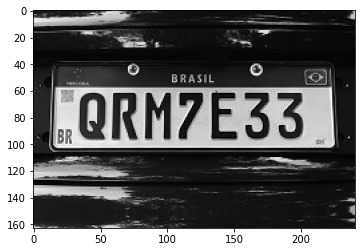

In [93]:
img = cv2.imread('image5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

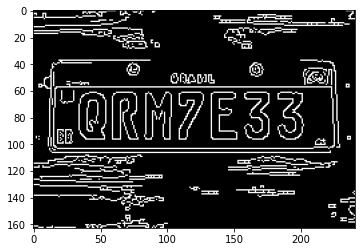

In [94]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [95]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)#[:10]

In [63]:
contours

[array([[[311, 537]],
 
        [[310, 538]],
 
        [[302, 538]],
 
        [[300, 540]],
 
        [[300, 565]],
 
        [[301, 566]],
 
        [[301, 583]],
 
        [[302, 584]],
 
        [[302, 586]],
 
        [[303, 587]],
 
        [[303, 588]],
 
        [[305, 588]],
 
        [[306, 589]],
 
        [[340, 589]],
 
        [[341, 590]],
 
        [[386, 590]],
 
        [[387, 591]],
 
        [[419, 591]],
 
        [[420, 592]],
 
        [[470, 592]],
 
        [[471, 593]],
 
        [[508, 593]],
 
        [[509, 594]],
 
        [[541, 594]],
 
        [[543, 592]],
 
        [[543, 586]],
 
        [[544, 585]],
 
        [[544, 584]],
 
        [[543, 583]],
 
        [[543, 546]],
 
        [[541, 544]],
 
        [[539, 544]],
 
        [[538, 543]],
 
        [[505, 543]],
 
        [[504, 542]],
 
        [[457, 542]],
 
        [[456, 541]],
 
        [[454, 541]],
 
        [[453, 542]],
 
        [[452, 542]],
 
        [[451, 541]],
 
        [[401, 5

In [96]:
locations = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        locations.append(approx)
    print(len(approx))

4
4
4
4
5
5
5
5
5
5
5
3
4
4
2
2
2
2
2
2
1
2
4
1
2
2
1
2
2
2
1
3
2
1
2
1
2
2
1
2
1
2
2
2
1
1
2
2
1
1
2
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
2
1
2
2
1
1
1
1
1
1
1
1
1
1
8
2
1
1
1
1
1
1
2
1
1
1
1
4
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
2
2
1
2
1
2
1
2
2
1
1
1
1
2
2
2
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1


In [69]:
locations[1]


array([[[300, 541]],

       [[538, 543]],

       [[543, 591]],

       [[306, 589]]], dtype=int32)

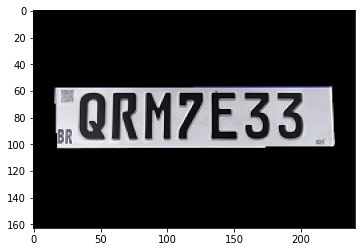

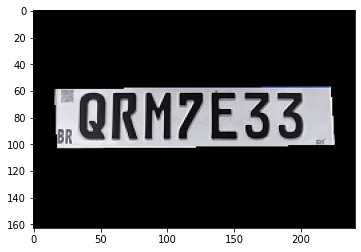

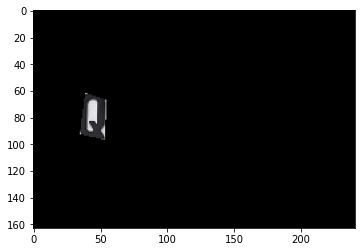

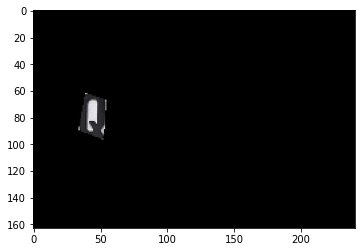

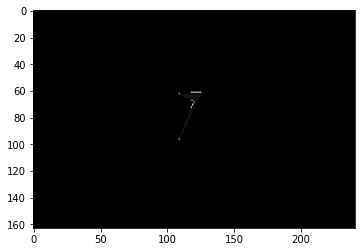

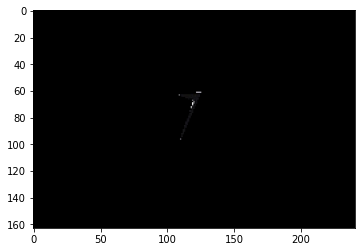

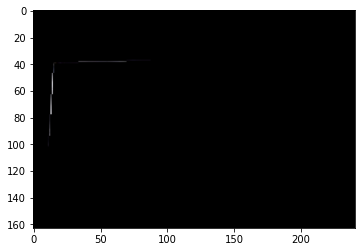

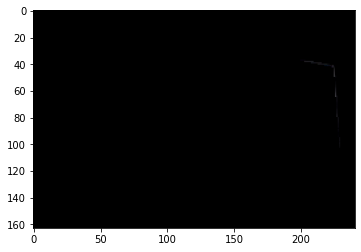

In [97]:
for location in locations:
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    plt.figure()
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    
    #plt.imshow(ima)

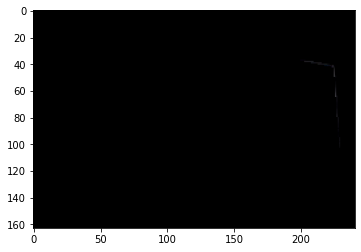

In [85]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [98]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

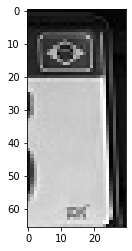

In [99]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:

# Deep copy for results:
inputImageCopy = cropped_image.copy()

# Convert BGR to grayscale:
grayscaleImage = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Threshold via Otsu:
threshValue, binaryImage = cv2.threshold(grayscaleImage, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Flood-fill border, seed at (0,0) and use black (0) color:
cv2.floodFill(binaryImage, None, (0, 0), 0)

# Get each bounding box
# Find the big contours/blobs on the filtered image:
contours, hierarchy = cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for _, c in enumerate(contours):

    # Get the bounding rectangle of the current contour:
    boundRect = cv2.boundingRect(c)
    print(boundRect)

    # Get the bounding rectangle data:
    rectX = boundRect[0]
    rectY = boundRect[1]
    rectWidth = boundRect[2]
    rectHeight = boundRect[3]

    # Estimate the bounding rect area:
    rectArea = rectWidth * rectHeight

    # Set a min area threshold
    minArea = 10

    # Filter blobs by area:
    if rectArea > minArea:
        
        plt.figure()
        cropped_image = binaryImage[rectX:rectX + rectWidth, rectY:rectY + rectHeight]
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [86]:
reader = easyocr.Reader(['pt'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


NameError: name 'cropped_image' is not defined

## 5. Render Result

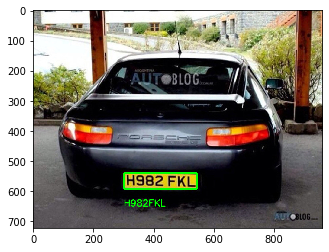

In [100]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))